Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Ud\
acity/DeepLearning-Udacity' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large. This may take a while. Please wait.
['/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/B', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/C', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/D', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/E', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/F', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/G', '/media/ldp/5EB82447B8241FCF/Daniela/Scoală

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [73]:
#Code written by LDP
#Display images from each class(directory)

number_sample_images = 10 #Number of images to be exposed from each class

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
classes_size = len(classes)

for i in range(0, classes_size):
    path_to_image = 'notMNIST_large/' + classes[i]
    image_names = os.listdir(path_to_image)
    image_names_size = len(image_names)
    for j in range(0, number_sample_images):
        #It exists a chance that an image to be taken twice
        nr_image = np.random.randint(0, image_names_size)
        print(image_names[nr_image])
        image = Image(path_to_image + '/' + image_names[nr_image])
        display(image)



TVJvY2t3ZWxsLm90Zg==.png


U2VjcmV0Q29kZS50dGY=.png


QmVuZ3VpYXRHb3RoaWMtQm9vay5vdGY=.png


QW1lcmljYW5UeXBld3JpdGVyTFQtTGlnaHQub3Rm.png


QUdCdWNoQlEtQm9sZEl0YWxpYy5vdGY=.png


U3RvbmVJbmZvcm1hbFN0ZC1Cb2xkLm90Zg==.png


TmV3QmFza2VydmlsbGVJVENieUJULUJsYWNrSXRhbC5vdGY=.png


RFRMQ2FzcGFyaVRDYXBzLUl0YWxpYy5vdGY=.png


Q29uZmVjdGlvbmVySkYudHRm.png


QUZJbnRlcmZhY2UtVHdvLm90Zg==.png


UGxhbmtzRGlzcGxheUNhcHMgQm9sZC50dGY=.png


R2VvIDk4Ni1Db25kZW5zZWQgQm9sZCBJdGFsaWMudHRm.png


SnVsaXVzIEIgVGh5c3Nlbi50dGY=.png


Umlnb3RvbGlvLm90Zg==.png


U2NyYXdsaWVzLnR0Zg==.png


QmVybnVyIE5vcm1hbC50dGY=.png


UXVpY2tzYW5zRmFzdElDRy1Cb2xkLm90Zg==.png


TGVmZmVydHMgQ29ybmVycyAyLnR0Zg==.png


VHcgQ2VuIE1ULnR0Zg==.png


QWxiZXJ0aW5hTVRTdGQtTWVkaXVtLm90Zg==.png


U2VyaWFyLUJvbGQub3Rm.png


RmF0IEZyZWUudHRm.png


TW9kZXJuODgwQlQtQm9sZC5vdGY=.png


TmV4dXNTYW5zLUl0YWxpYy5vdGY=.png


Q2VudHVyeUdvdGhpY1N0ZC1Cb2xkSXRhbGljLm90Zg==.png


VGhyb2hhbmRJbmstSXRhbGljLm90Zg==.png


RG9tQ2FzdWFsQlQtUmVndWxhci5vdGY=.png


V2VpZGVtYW5uU0NFRi1Cb29rLm90Zg==.png


SmFuc29uIE9sZFN0eWxlIFNTaSBCb2xkIE9sZHN0eWxlIEZpZ3VyZXMudHRm.png


QmFsYW5jZS1JdGFsaWMub3Rm.png


QXJjYW5lQnJvYWQgSXRhbGljLnR0Zg==.png


R2x5cGhhLUJsYWNrLm90Zg==.png


Rmdyb292ZUVpZ2h0eS5vdGY=.png


UGVuZ3VpbiBBdHRhY2sudHRm.png


RFRMVW5pY29ULUNhcHNJdGFsaWMub3Rm.png


RXJpbnNIYW5kIFJlZ3VsYXIudHRm.png


UHJvdkxpdGUgSXRhbGljLnR0Zg==.png


RWdnbyBCb2xkLnR0Zg==.png


QmVybnN0ZWluLUxpZ2h0Lm90Zg==.png


T3NpcmlzQlEtTWVkaXVtLm90Zg==.png


QmVya2VsZXlTdGQtQm9sZEl0YWxpYy5vdGY=.png


TW9uYUxpc2FFRi1Tb2xpZC5vdGY=.png


UVRUaW1lT3V0bGluZSBSZWd1bGFyLnR0Zg==.png


S3Jhc25pIEZlbGxvd3MudHRm.png


U2hpbm5Cb29rSXRhbGljVGFiLm90Zg==.png


S29zaGdhcmlhbi1MaWdodCBNZWRpdW0udHRm.png


R3VqYXJhdGlSYWprb3RTU0sudHRm.png


QmFyY2Vsb25hQlEtQm9va0l0YWxpYy5vdGY=.png


SGFsbGFuZGFsZSBTdGVuY2lsIEpMLnR0Zg==.png


RnVqaSBXaWRlIEJvbGQgSXRhbGljLnR0Zg==.png


V2luZHNvckRlbWkuZm9nLnR0Zg==.png


TWV0cm9saW5lLm90Zg==.png


Q2dRdWFpbnRSb21hbi50dGY=.png


Q3lwcnVzTGlnaHQub3Rm.png


QXJnZW50dW0gV2hpdGUudHRm.png


QnJ1c2ggRmxhaXIgUmVndWxhci50dGY=.png


SGVicmV3IFJlZ3VsYXIudHRm.png


RmVuaWNlQm9vay5vdGY=.png


U3F1aXJlRCBCb2xkLnR0Zg==.png


UG9wcGxQb250aWZleEV4cEJRLUl0YWxpY09zRi5vdGY=.png


SnVrZWJveC5vdGY=.png


SW50ZXJ2aWV3ZXItUmVndWxhcmx5Lm90Zg==.png


U21pbGV5IEZvbnQoMSkudHRm.png


TWluaW9uUHJvLU1lZGl1bUNuU3ViaC5vdGY=.png


U0YgQ29zbWljIEFnZSBPdXRsaW5lIE9ibGlxdWUudHRm.png


RGllZ29Db24gM0QudHRm.png


R2FyYW1vbmQgQkUgTWVkaXVtIENvbmRlbnNlZC50dGY=.png


UGl4ZWxQaXJhdGUudHRm.png


T3JpZW50YWwgSWNvbnMgSUlJLnR0Zg==.png


TGludCBNY0NyZWUgQkIgQm9sZC50dGY=.png


QkQgQmFyZHVzdC50dGY=.png


SG90cm9kLnR0Zg==.png


QWdlbmRhLU1lZGl1bS5vdGY=.png


UmFjZXdheSBNZWRpdW0udHRm.png


MzAwMC50dGY=.png


TWFyYnJvb2tCUS1NZWRpdW0ub3Rm.png


Q3JheW9uLUV4dGVuZGVkIEJvbGQgSXRhbGljLnR0Zg==.png


SG9ybGV5IE9sZCBTdHlsZSBNVCBJdGFsaWMudHRm.png


RmFybmhhbURpc3BsYXktTGlnaHRPU0Yub3Rm.png


QmVya2VsZXktQmxhY2sub3Rm.png


TWVtb2lyQ29uZGVuc2VkIEJvbGQgSXRhbGljLnR0Zg==.png


Q2FlY2lsaWEtQm9sZEl0YWxpYy5vdGY=.png


RkZGIEludGVsbGlnZW50LnR0Zg==.png


Q2VudHVyeU9sZHN0eWxlQlQtQm9sZC5vdGY=.png


SHVtYW5zdDUyMSBCVCBCb2xkLnR0Zg==.png


SVRDU3ltYm9sU3RkLUJsYWNrLm90Zg==.png


T3JjaGlkIEJsYWNrIFNTaSBCbGFjay50dGY=.png


QnJvYWRzaWRlLUNvbmRlbnNlZCBOb3JtYWwudHRm.png


RGFudGVNVC1Cb2xkLm90Zg==.png


Qm9kb25pTm8xRUYtQmxhY2tJdGFsaWMub3Rm.png


V2Vpc3MgSXRhbGljIEJULnR0Zg==.png


QXV0bzMtUmVndWxhclNtQ3AudHRm.png


TGF0aWVubmVFRi1JdGFsaWNTQy5vdGY=.png


R291ZHlUZXh0TVQtRGZyLm90Zg==.png


UDIyIEN1c3AgU3F1YXJlLnR0Zg==.png


Um9ja2V0IFR5cGUgQm9sZCBJdGFsaWMudHRm.png


QWRpbmVLZXJuYmVyZyBSZWd1bGFyLnR0Zg==.png


SG9iYnkgTm9ybWFsLnR0Zg==.png


VW5pdmVycyA1MyBFeHRlbmRlZCBPYmxpcXVlLnBmYg==.png


VEZGb3JldmVyLU1lZGl1bUl0YWxpYy5vdGY=.png


We want to keep data in memory to access it more quickly.
Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [100]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try: #data here is normalized
      image_data = (imageio.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except (IOError, ValueError) as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle' #pickle file = python object serialization
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A.pickle.
/media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A
Could not read: /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: /media/ldp/5EB82447B8241FCF/Daniela/Scoală/Cursuri/DeepLearning-Udacity/DeepLearning-Udacity/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Full dataset tensor:

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

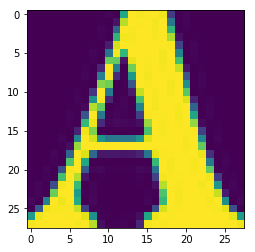

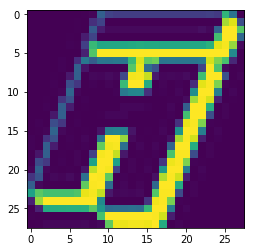

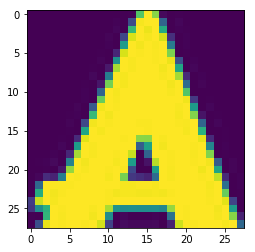

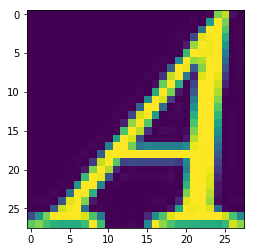

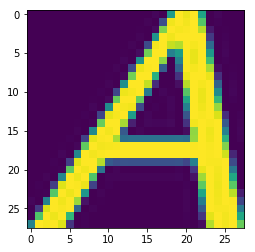

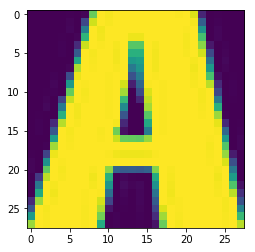

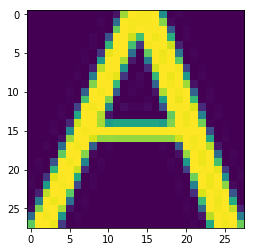

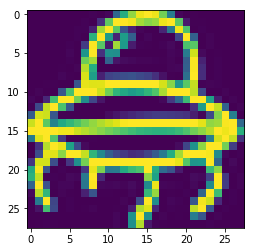

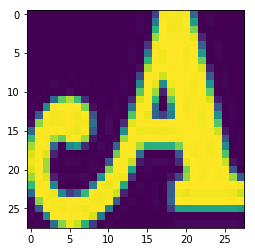

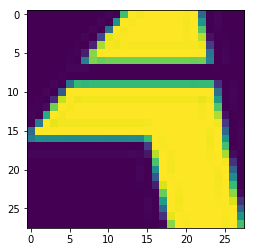

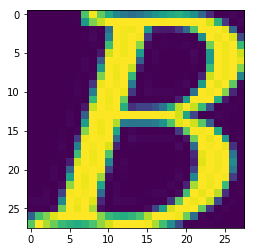

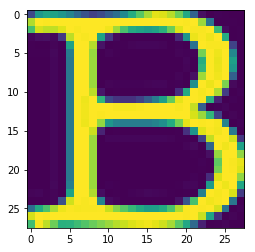

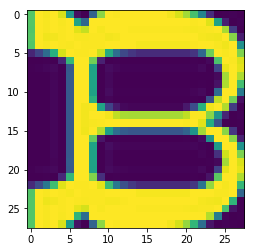

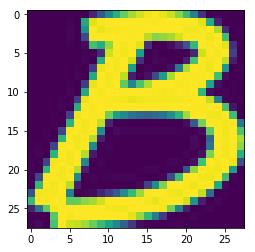

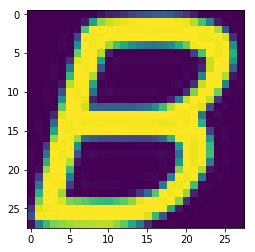

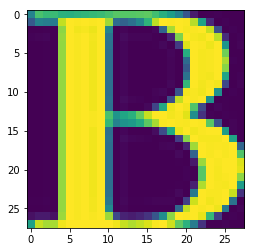

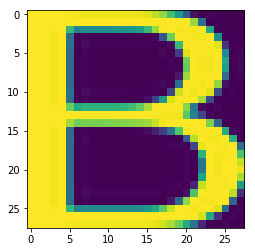

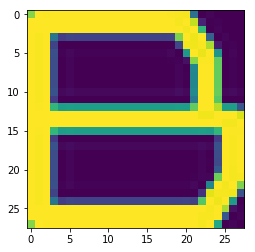

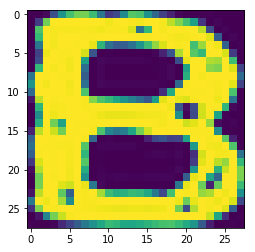

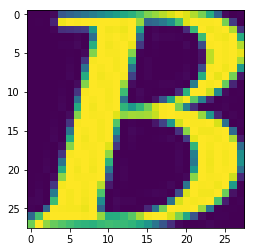

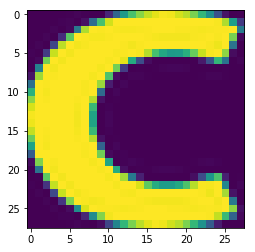

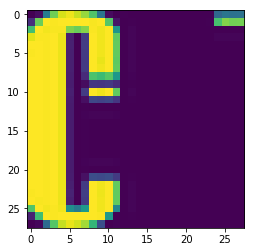

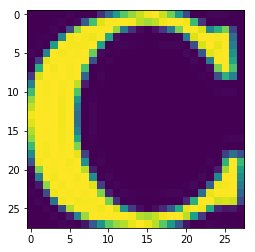

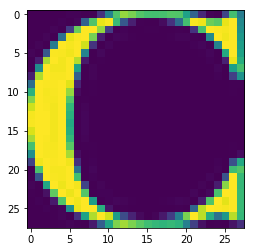

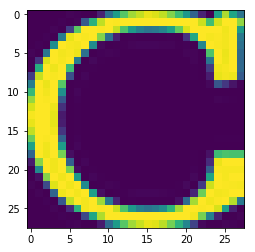

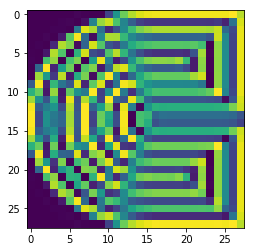

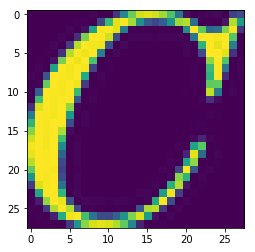

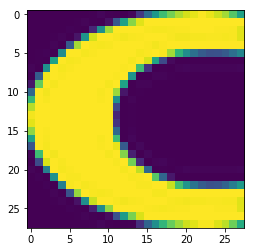

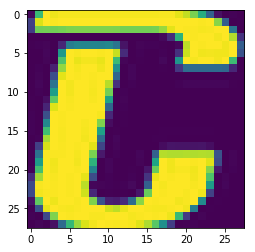

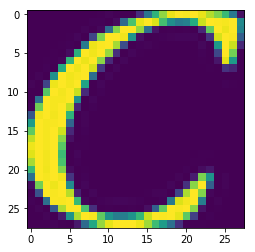

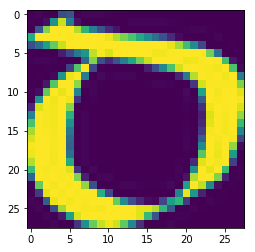

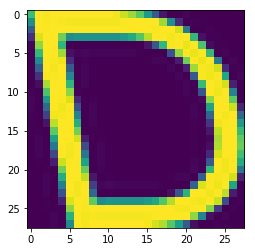

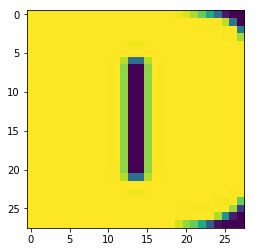

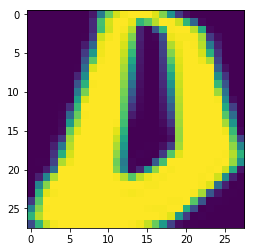

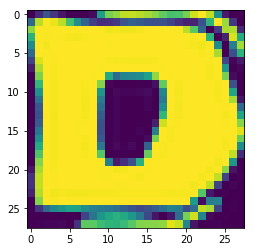

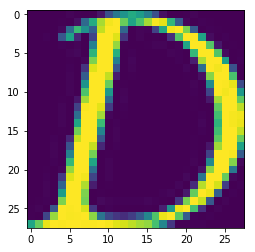

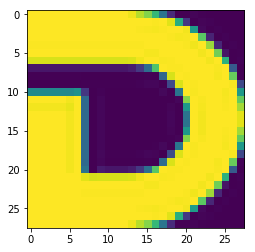

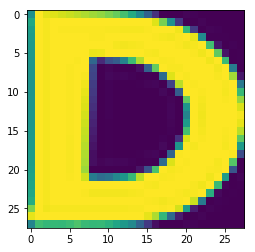

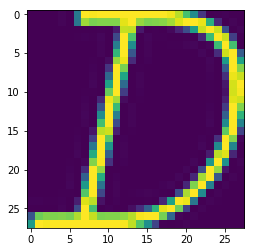

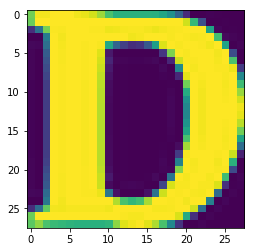

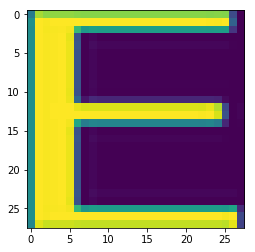

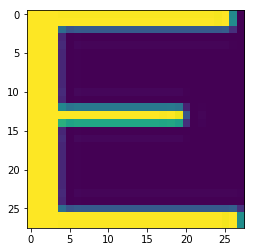

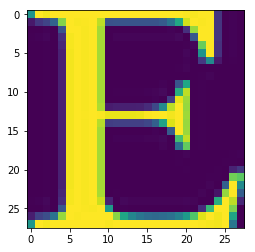

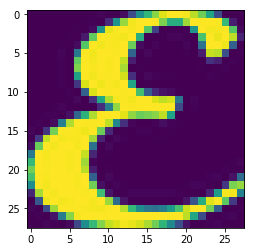

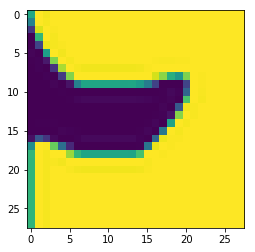

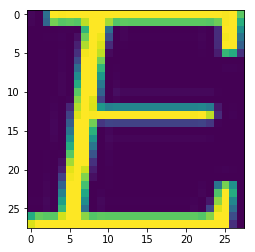

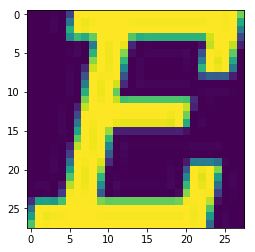

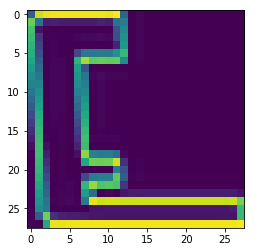

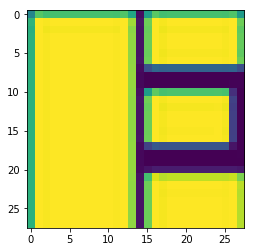

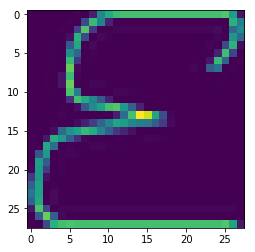

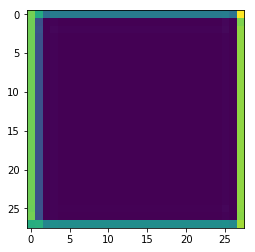

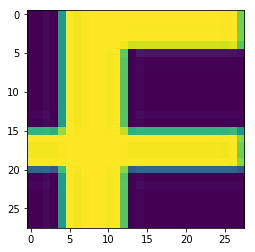

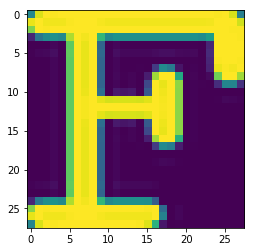

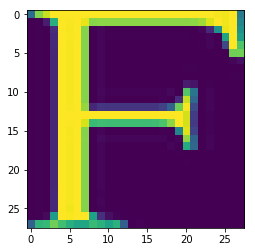

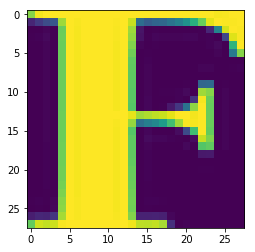

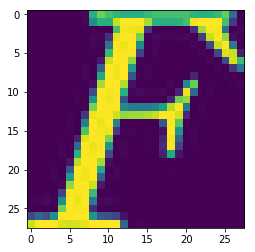

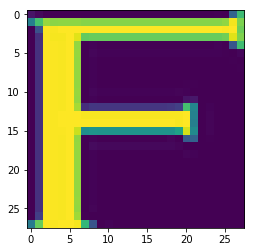

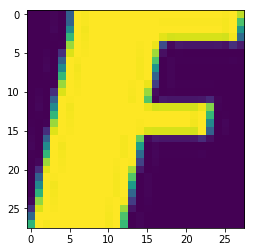

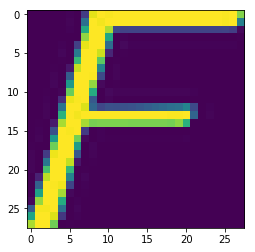

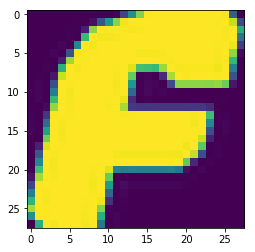

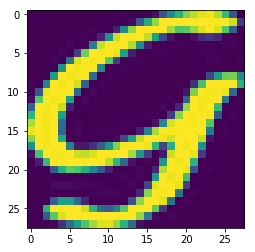

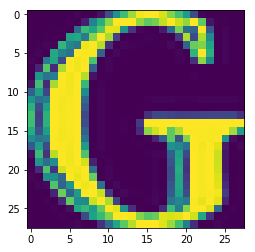

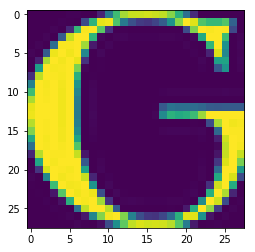

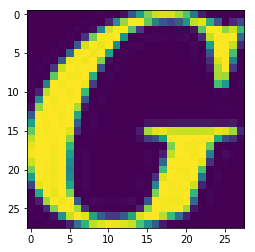

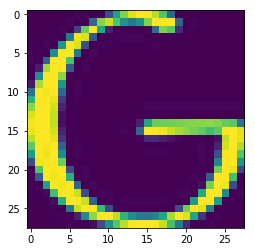

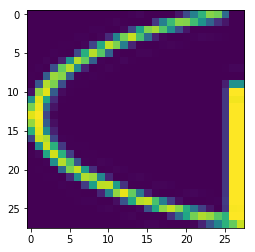

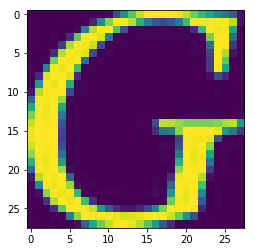

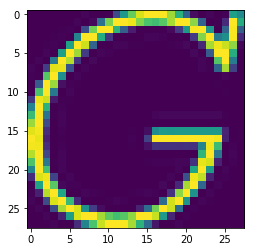

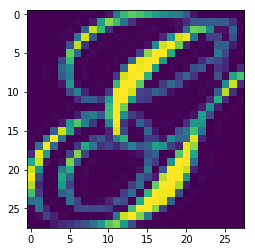

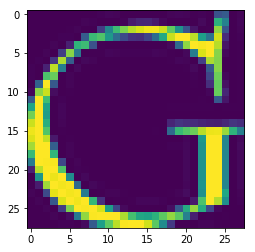

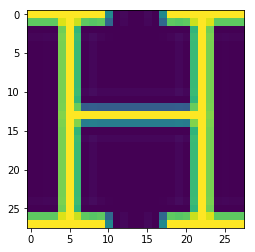

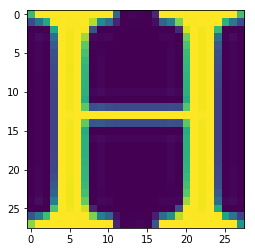

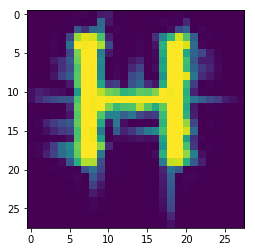

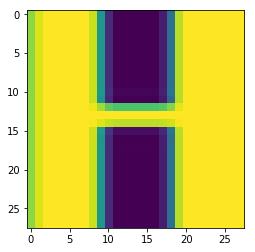

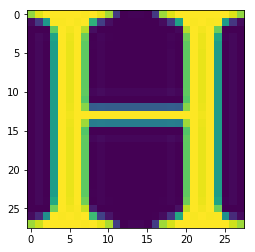

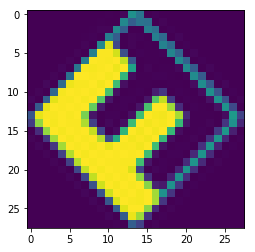

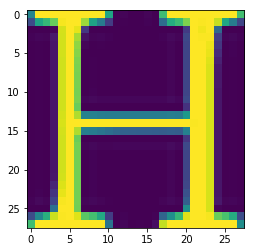

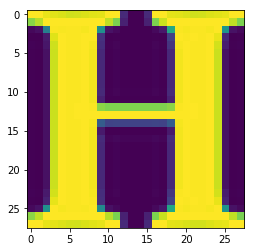

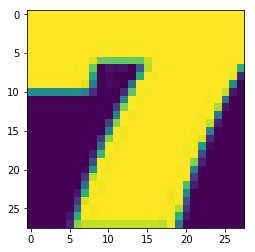

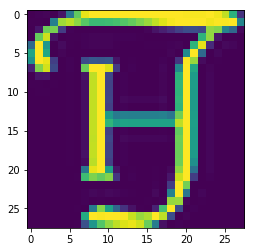

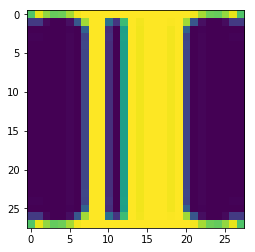

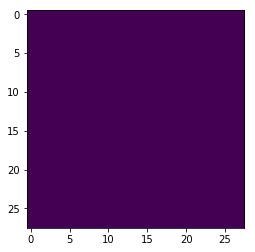

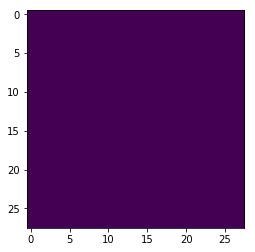

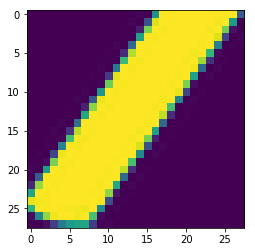

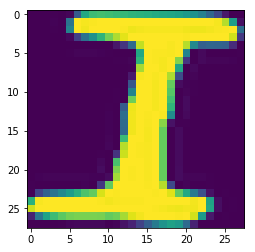

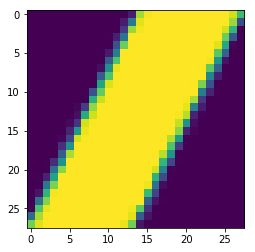

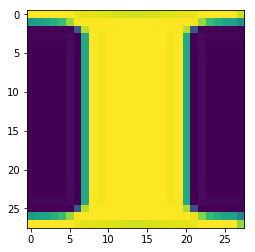

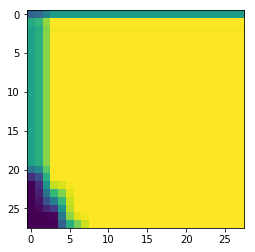

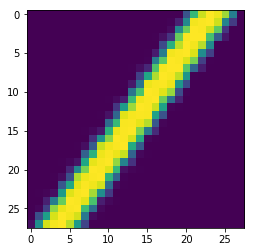

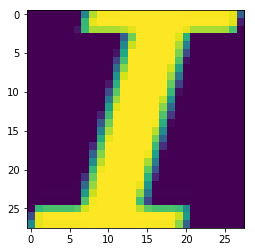

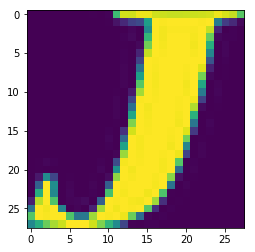

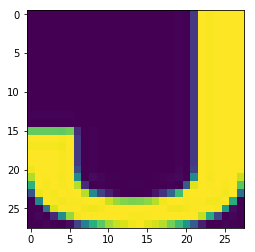

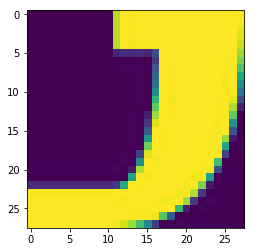

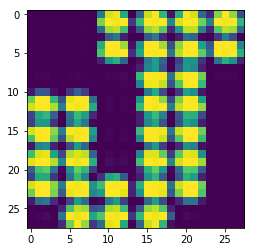

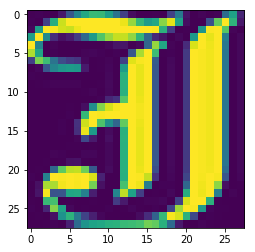

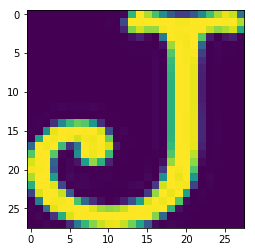

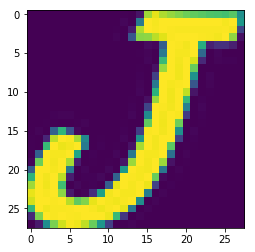

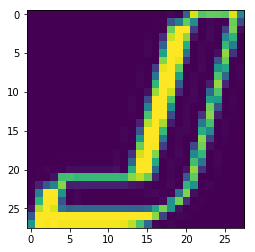

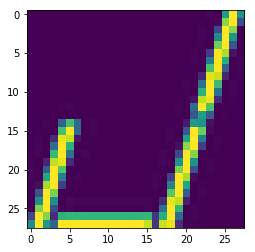

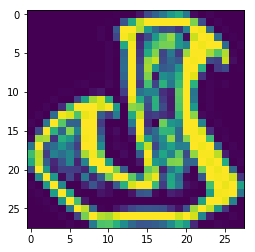

In [101]:
#Code written by LDP
#Display images from each class(directory)

number_sample_images = 10 #Number of images to be exposed from each class

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
classes_size = len(classes)

for i in range(0, classes_size):
    #deserialization of file in order to plot the image
    pkl_file = open('notMNIST_large/' + classes[i] + '.pickle','rb')
    images_data = pickle.load(pkl_file)
    for j in range(0, number_sample_images):
        #It exists a chance that an image to be taken twice
        nr_image = np.random.randint(0, image_names_size)
        #print()
        plt.imshow(images_data[nr_image], interpolation='nearest')
        plt.show()
    

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [0]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training (200000, 28, 28) (200000,)
Validation (10000, 28, 28) (10000,)
Testing (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [0]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

Finally, let's save the data for later reuse:

In [0]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [0]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 718193801


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---